In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/home/nikita/Downloads/train.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [65]:
df.drop('id', axis=1, inplace=True)

ohe: marital (3), default (2), education (4), housing (2), loan (2), contact (3)

total count of new features 3+2+3+2+2+3 -1*6 = 15-6=9 

In [66]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0


In [67]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [68]:
df['month']

0         aug
1         jun
2         may
3         may
4         feb
         ... 
749995    jul
749996    aug
749997    apr
749998    aug
749999    aug
Name: month, Length: 750000, dtype: object

In [69]:
len(df['month'].unique())

12

In [70]:
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month']

0         8
1         6
2         5
3         5
4         2
         ..
749995    7
749996    8
749997    4
749998    8
749999    8
Name: month, Length: 750000, dtype: int32

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')

In [73]:
encoded_data = ohe.fit_transform(df[['marital', 'default', 'education', 'housing', 'loan', 'contact']])

In [74]:
df.drop(['marital', 'default', 'education', 'housing', 'loan', 'contact'], axis=1, inplace=True)

In [75]:
df

,age,job,balance,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,7,25,8,117,3,-1,0,unknown,0
1,38,blue-collar,514,18,6,185,1,-1,0,unknown,0
2,36,blue-collar,602,14,5,111,2,-1,0,unknown,0
3,27,student,34,28,5,10,2,-1,0,unknown,0
4,26,technician,889,3,2,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,1282,4,7,1006,2,-1,0,unknown,1
749996,69,retired,631,19,8,87,1,-1,0,unknown,0
749997,50,blue-collar,217,17,4,113,1,-1,0,unknown,0
749998,32,technician,-274,26,8,108,6,-1,0,unknown,0


In [76]:
df = pd.concat([df, encoded_data], axis=1)

In [77]:
enc_potcome = ohe.fit_transform(df[['poutcome']])
df = pd.concat([df, enc_potcome], axis=1)
df.drop('poutcome', axis=1, inplace=True)
df

,age,job,balance,day,month,duration,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,42,technician,7,25,8,117,3,-1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38,blue-collar,514,18,6,185,1,-1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,36,blue-collar,602,14,5,111,2,-1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,27,student,34,28,5,10,2,-1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,26,technician,889,3,2,902,1,-1,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,1282,4,7,1006,2,-1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
749996,69,retired,631,19,8,87,1,-1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
749997,50,blue-collar,217,17,4,113,1,-1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
749998,32,technician,-274,26,8,108,6,-1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
enc_job = ohe.fit_transform(df[['job']])
df = pd.concat([df, enc_job], axis=1)
df.drop('job', axis=1, inplace=True)
df

,age,balance,day,month,duration,campaign,pdays,previous,y,marital_married,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,42,7,25,8,117,3,-1,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,514,18,6,185,1,-1,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,602,14,5,111,2,-1,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,34,28,5,10,2,-1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,26,889,3,2,902,1,-1,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,1282,4,7,1006,2,-1,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
749996,69,631,19,8,87,1,-1,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
749997,50,217,17,4,113,1,-1,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749998,32,-274,26,8,108,6,-1,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
df.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

<Axes: >

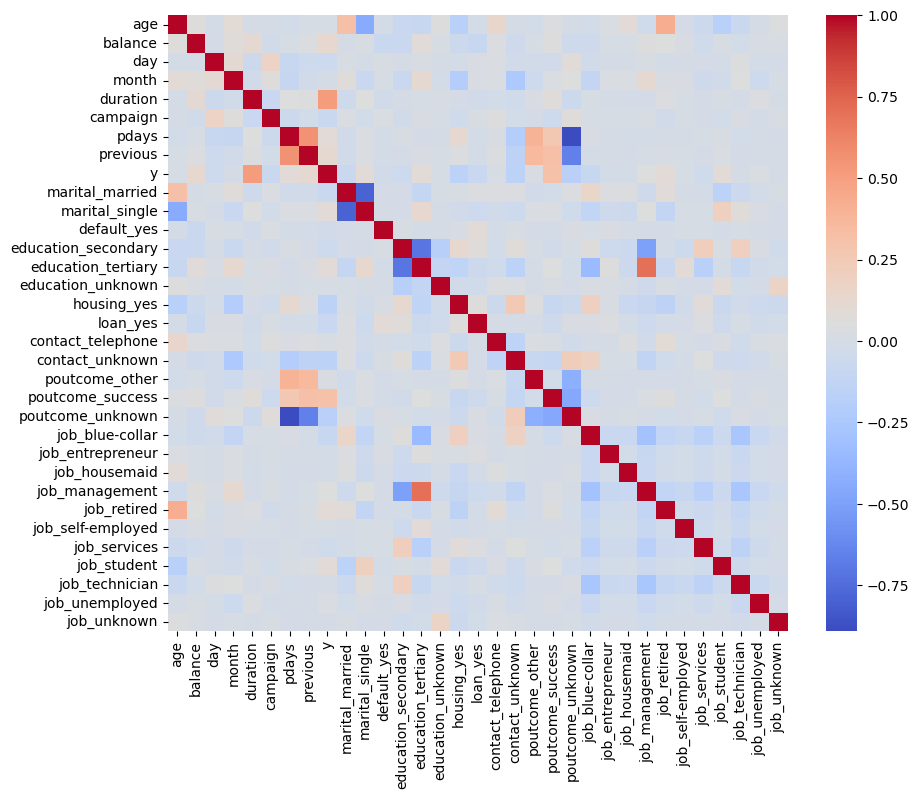

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm')

In [81]:
df.drop(['poutcome_unknown', 'marital_single', 'education_tertiary'], axis=1, inplace=True)

<Axes: >

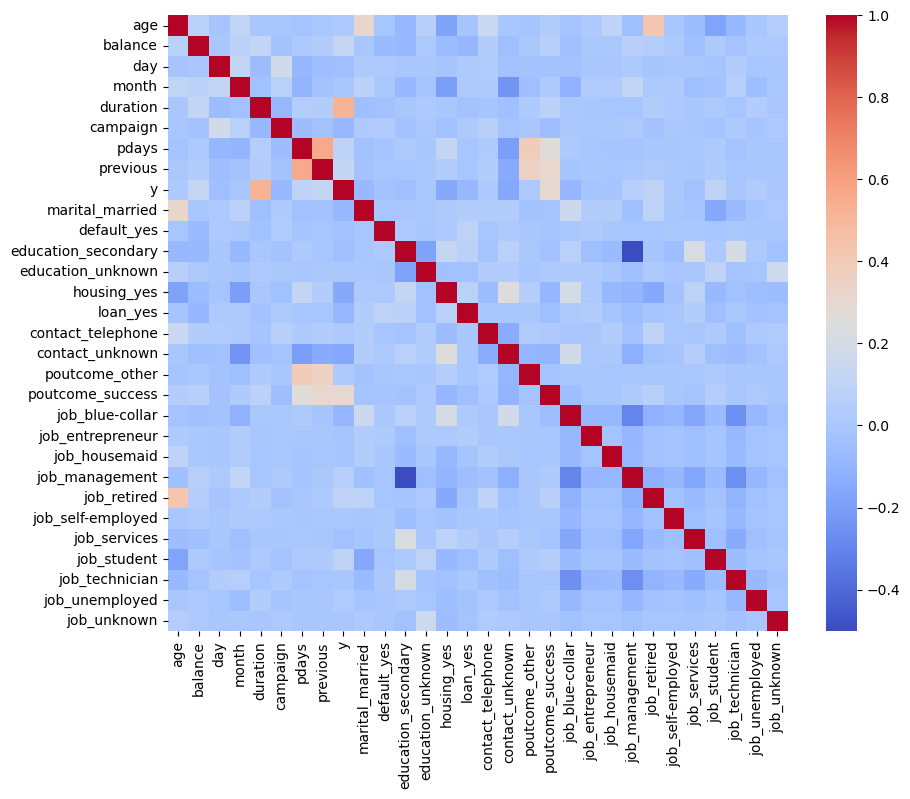

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm')

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
X_train = df.drop('y', axis=1)

y_train = df['y']

In [86]:
X_test = pd.read_csv('/home/nikita/Downloads/test.csv')

In [87]:
X_test.drop('id', axis=1, inplace=True)

In [88]:
X_test['month'] = pd.to_datetime(X_test['month'], format='%b').dt.month

In [89]:
encoded_data_2 = ohe.fit_transform(X_test[['marital', 'default', 'education', 'housing', 'loan', 'contact']])

In [90]:
X_test.drop(['marital', 'default', 'education', 'housing', 'loan', 'contact'], axis=1, inplace=True)

In [91]:
X_test = pd.concat([X_test, encoded_data_2], axis=1)

In [92]:
enc_potcome_2 = ohe.fit_transform(X_test[['poutcome']])
X_test = pd.concat([X_test, enc_potcome_2], axis=1)
X_test.drop('poutcome', axis=1, inplace=True)
enc_job_2 = ohe.fit_transform(X_test[['job']])
X_test = pd.concat([X_test, enc_job_2], axis=1)
X_test.drop('job', axis=1, inplace=True)
X_test

,age,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,32,1397,21,5,224,1,-1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,23,3,4,586,2,-1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,46,13,5,111,2,-1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,58,-1380,29,5,125,1,-1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,1950,22,7,181,1,-1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,0,18,11,65,2,-1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249996,40,522,19,11,531,1,189,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
249997,63,33,3,7,178,1,92,8,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
249998,50,2629,30,5,163,2,-1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X_test.drop(['poutcome_unknown', 'marital_single', 'education_tertiary'], axis=1, inplace=True)

In [94]:
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [95]:
from sklearn.linear_model import LogisticRegressionCV

In [96]:
model = LogisticRegressionCV(Cs=10,
        cv=5,
        scoring='roc_auc',
        max_iter=1000,
        penalty='l2',
        solver='lbfgs',
        random_state=42,
        n_jobs=-1)

In [97]:
model.fit(X_train_sc, y_train)

,Cs,10
,fit_intercept,True
,cv,5
,dual,False
,penalty,'l2'
,scoring,'roc_auc'
,solver,'lbfgs'
,tol,0.0001
,max_iter,1000
,class_weight,None
,n_jobs,-1


In [98]:
y_pred_proba = model.predict_proba(X_test_sc)

In [106]:
y_pred_proba_class_1 = y_pred_proba[:, 1]

In [100]:
df_2 = pd.read_csv('/home/nikita/Downloads/test.csv')

In [107]:
submission = pd.DataFrame(data={'id': df_2['id'], 'y': y_pred_proba_class_1})

In [108]:
submission.to_csv('submission.csv', index=False)